In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("data/diabetesdata.csv")


In [3]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [4]:
df.dtypes

Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object

In [5]:
df.count()

Age                   520
Gender                520
Polyuria              520
Polydipsia            520
sudden weight loss    520
weakness              520
Polyphagia            520
Genital thrush        520
visual blurring       520
Itching               520
Irritability          520
delayed healing       520
partial paresis       520
muscle stiffness      520
Alopecia              520
Obesity               520
class                 520
dtype: int64

In [6]:
df.isnull().sum()


Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [7]:
df = df.replace('No',0)
df = df.replace('Yes',1)
df = df.replace('Female',0)
df = df.replace('Male',1)


<AxesSubplot:>

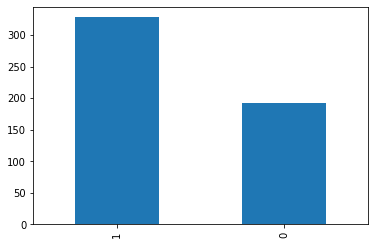

In [8]:
df['Gender'].value_counts()
df['Gender'].value_counts().plot(kind='bar')


In [9]:
df['Age'].max()
df['Age'].min()
labels = ["Less than 10","10-20","20-30","30-40","40-50","50-60","60-70","70-80","80-90","90 and more"]
bins= [0,10,20,30,40,50,60,70,80,90,100]
freq_df = df.groupby(pd.cut(df['Age'],bins=bins,labels=labels)).size()


<AxesSubplot:xlabel='Age'>

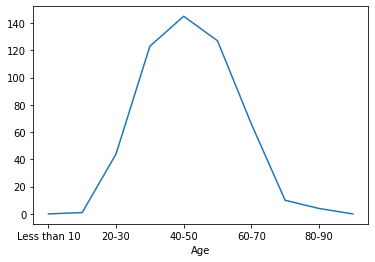

In [10]:
freq_df.plot(kind='line')


<AxesSubplot:xlabel='Age'>

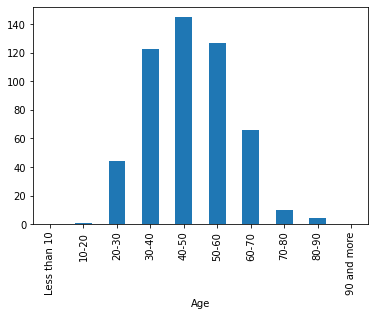

In [11]:
freq_df.plot(kind='bar')


In [12]:
plt.bar(freq_df['Age'],freq_df['count'])
plt.ylabel('Counts')
plt.title('Frequency Count of Age')
plt.show()


KeyError: 'Age'

/Users/amirbhd/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

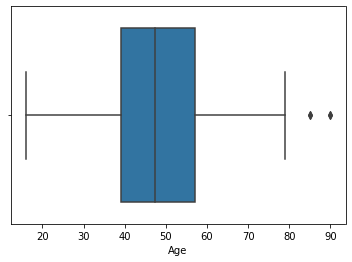

In [13]:
import seaborn as sns
sns.boxplot(df['Age'])


/Users/amirbhd/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Irritability'>

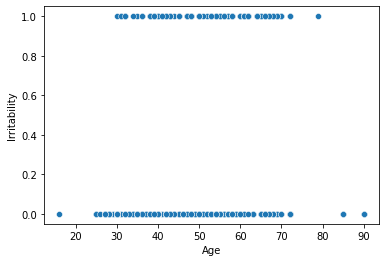

In [14]:
sns.scatterplot(df['Age'],df['Irritability'])


<AxesSubplot:xlabel='Irritability', ylabel='Age'>

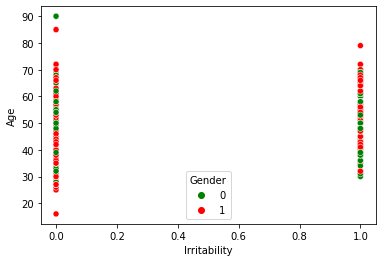

In [15]:
sns.scatterplot(x=df['Irritability'],y=df['Age'],hue=df['Gender'], palette=['green','red'],data=df)


In [16]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3 - q1
IQR


Age                   18.0
Gender                 1.0
Polyuria               1.0
Polydipsia             1.0
sudden weight loss     1.0
weakness               1.0
Polyphagia             1.0
Genital thrush         0.0
visual blurring        1.0
Itching                1.0
Irritability           0.0
delayed healing        1.0
partial paresis        1.0
muscle stiffness       1.0
Alopecia               1.0
Obesity                0.0
dtype: float64

In [17]:
(df < (q1 -1.5 * IQR)) | (df >(q3 + 1.5 * IQR))


,Age,Alopecia,Gender,Genital thrush,Irritability,Itching,Obesity,Polydipsia,Polyphagia,Polyuria,class,delayed healing,muscle stiffness,partial paresis,sudden weight loss,visual blurring,weakness
0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
516,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
517,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
518,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
df_no_outlier = df[~((df < (q1 -1.5 * IQR)) | (df >(q3 + 1.5 * IQR))).any(axis=1)]
df_no_outlier


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Positive
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,Positive
14,60,1,1,1,0,1,1,0,1,1,0,1,1,0,0,0,Positive
15,58,1,1,1,0,1,1,0,0,0,0,1,1,1,0,0,Positive
18,66,1,1,1,0,1,1,0,1,0,0,0,1,1,0,0,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,43,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Negative
514,54,0,1,1,1,1,1,0,0,0,0,0,1,0,0,0,Positive
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,Positive
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,Negative


In [19]:
print(df.shape)
print(df_no_outlier.shape)



(520, 17)
(276, 17)


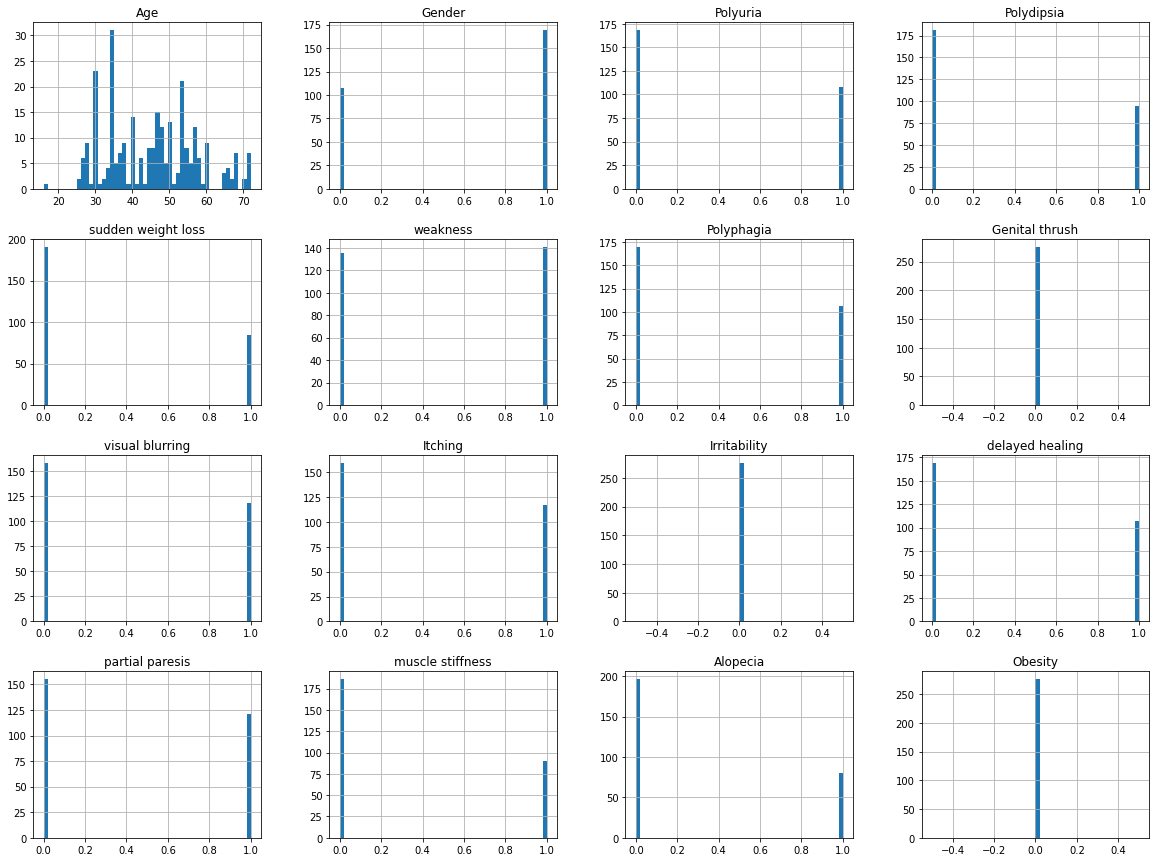

In [20]:
df_no_outlier.hist(bins=50,figsize=(20,15))
plt.show()


In [21]:
df_no_outlier = df[~((df < (q1 -1.5 * IQR)) | (df >(q3 + 1.5 * IQR))).any(axis=1)]
df_no_outlier


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Positive
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,Positive
14,60,1,1,1,0,1,1,0,1,1,0,1,1,0,0,0,Positive
15,58,1,1,1,0,1,1,0,0,0,0,1,1,1,0,0,Positive
18,66,1,1,1,0,1,1,0,1,0,0,0,1,1,0,0,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,43,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Negative
514,54,0,1,1,1,1,1,0,0,0,0,0,1,0,0,0,Positive
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,Positive
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,Negative


In [22]:
print(df.shape)
print(df_no_outlier.shape)

(520, 17)
(276, 17)


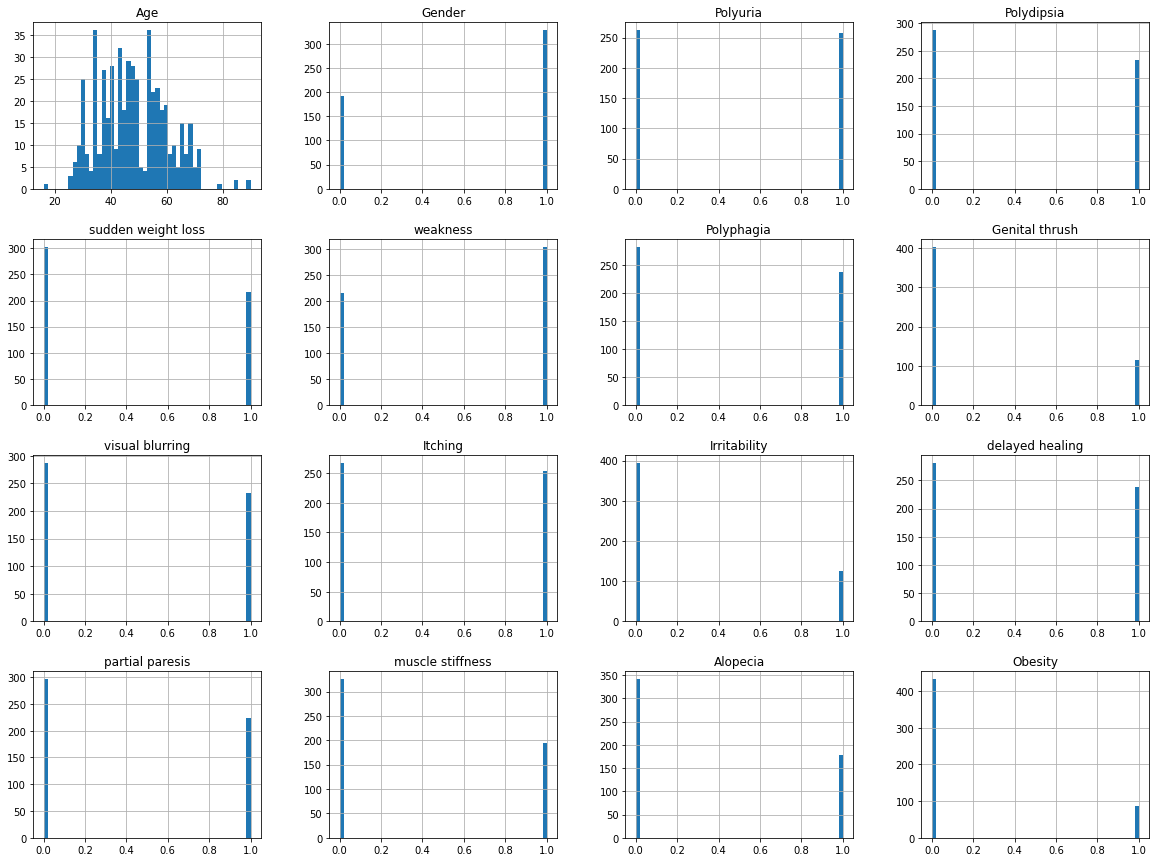

In [23]:
df.hist(bins=50,figsize=(20,15))
plt.show()

In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection  import chi2

In [25]:
df.head()


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,Positive
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Positive
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,Positive
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,Positive
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,Positive


In [26]:
df.columns


Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [27]:
xfeatures = df[['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity']]
ylabels = df['class']

In [28]:
skb = SelectKBest(score_func=chi2,k=10)
best_feature_fit = skb.fit(xfeatures,ylabels)

In [29]:
df = df.replace('Negative',0)
df = df.replace('Positive',1)

In [30]:
print("Scores",best_feature_fit.scores_)

Scores [1.88457668e+01 3.87476372e+01 1.16184593e+02 1.20785515e+02
 5.77493088e+01 1.27242623e+01 3.31984177e+01 4.91400862e+00
 1.81245708e+01 4.78260870e-02 3.53341270e+01 6.20188285e-01
 5.53142857e+01 4.87500000e+00 2.44027933e+01 2.25028409e+00]


In [31]:
bf_02 = best_feature_fit.transform(xfeatures)
bf_02

array([[40,  1,  0, ...,  0,  0,  1],
       [58,  1,  0, ...,  0,  1,  1],
       [41,  1,  1, ...,  0,  0,  1],
       ...,
       [58,  0,  1, ...,  0,  1,  0],
       [32,  0,  0, ...,  0,  0,  1],
       [42,  1,  0, ...,  0,  0,  0]])

In [32]:
feature_scores = pd.DataFrame(best_feature_fit.scores_,columns=['Feature_Scores'])
feature_scores

,Feature_Scores
0,18.845767
1,38.747637
2,116.184593
3,120.785515
4,57.749309
5,12.724262
6,33.198418
7,4.914009
8,18.124571
9,0.047826


In [33]:
feature_column_names = pd.DataFrame(xfeatures.columns,columns=['Feature_name'])
best_feat_df = pd.concat([feature_scores,feature_column_names],axis=1)
best_feat_df

,Feature_Scores,Feature_name
0,18.845767,Age
1,38.747637,Gender
2,116.184593,Polyuria
3,120.785515,Polydipsia
4,57.749309,sudden weight loss
5,12.724262,weakness
6,33.198418,Polyphagia
7,4.914009,Genital thrush
8,18.124571,visual blurring
9,0.047826,Itching


In [85]:
print(best_feat_df)

    Feature_Scores        Feature_name
0        18.845767                 Age
1        38.747637              Gender
2       116.184593            Polyuria
3       120.785515          Polydipsia
4        57.749309  sudden weight loss
5        12.724262            weakness
6        33.198418          Polyphagia
7         4.914009      Genital thrush
8        18.124571     visual blurring
9         0.047826             Itching
10       35.334127        Irritability
11        0.620188     delayed healing
12       55.314286     partial paresis
13        4.875000    muscle stiffness
14       24.402793            Alopecia
15        2.250284             Obesity


In [34]:
best_feat_df.nlargest(15,'Feature_Scores')


,Feature_Scores,Feature_name
3,120.785515,Polydipsia
2,116.184593,Polyuria
4,57.749309,sudden weight loss
12,55.314286,partial paresis
1,38.747637,Gender
10,35.334127,Irritability
6,33.198418,Polyphagia
14,24.402793,Alopecia
0,18.845767,Age
8,18.124571,visual blurring


In [35]:
best_feat_df.nlargest(15,'Feature_Scores')['Feature_name'].unique()


array(['Polydipsia', 'Polyuria', 'sudden weight loss', 'partial paresis',
       'Gender', 'Irritability', 'Polyphagia', 'Alopecia', 'Age',
       'visual blurring', 'weakness', 'Genital thrush',
       'muscle stiffness', 'Obesity', 'delayed healing'], dtype=object)

In [36]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [37]:
logit = LogisticRegression()
rfe = RFE(logit,10)
rfe_fit = rfe.fit(xfeatures,ylabels)


/Users/amirbhd/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/amirbhd/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
selected_features = pd.DataFrame(rfe_fit.support_,columns=['Selected_Features'])
ranking_features = pd.DataFrame(rfe_fit.ranking_,columns=['ranking_Features'])
rfe_feature_df = pd.concat([feature_column_names,selected_features,ranking_features],axis=1)
rfe_feature_df


,Feature_name,Selected_Features,ranking_Features
0,Age,False,7
1,Gender,True,1
2,Polyuria,True,1
3,Polydipsia,True,1
4,sudden weight loss,True,1
5,weakness,False,2
6,Polyphagia,True,1
7,Genital thrush,True,1
8,visual blurring,False,4
9,Itching,True,1


In [39]:
from sklearn.ensemble import ExtraTreesClassifier


In [40]:
et_clf = ExtraTreesClassifier()
et_clf.fit(xfeatures,ylabels)

ExtraTreesClassifier()

In [41]:
print(et_clf.feature_importances_)


[0.05176446 0.10793694 0.20628115 0.20810717 0.06140325 0.02063288
 0.03064165 0.02717865 0.03363568 0.03376986 0.04348462 0.0384616
 0.05380882 0.02369528 0.04007576 0.0191222 ]


In [42]:
feature_imporance_df = pd.Series(et_clf.feature_importances_,index=xfeatures.columns)
feature_imporance_df


Age                   0.051764
Gender                0.107937
Polyuria              0.206281
Polydipsia            0.208107
sudden weight loss    0.061403
weakness              0.020633
Polyphagia            0.030642
Genital thrush        0.027179
visual blurring       0.033636
Itching               0.033770
Irritability          0.043485
delayed healing       0.038462
partial paresis       0.053809
muscle stiffness      0.023695
Alopecia              0.040076
Obesity               0.019122
dtype: float64

<AxesSubplot:>

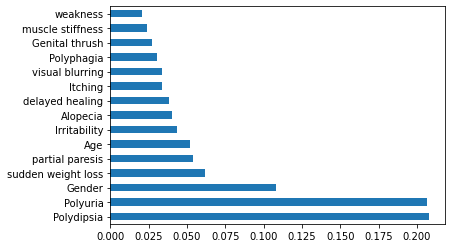

In [43]:
feature_imporance_df.nlargest(15).plot(kind='barh')


In [44]:
df.corr()


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
Age,1.000000,0.062872,0.199781,0.137382,0.064808,0.224596,0.315577,0.096519,0.402729,0.296559,0.201625,0.257501,0.232742,0.307703,0.321691,0.140458,0.108679
Gender,0.062872,1.000000,-0.268894,-0.312262,-0.281840,-0.124490,-0.219968,0.208961,-0.208092,-0.052496,-0.013735,-0.101978,-0.332288,-0.090542,0.327871,-0.005396,-0.449233
Polyuria,0.199781,-0.268894,1.000000,0.598609,0.447207,0.263000,0.373873,0.087273,0.235095,0.088289,0.237740,0.149873,0.441664,0.152938,-0.144192,0.126567,0.665922
Polydipsia,0.137382,-0.312262,0.598609,1.000000,0.405965,0.332453,0.316839,0.028081,0.331250,0.128716,0.203446,0.115691,0.442249,0.180723,-0.310964,0.098691,0.648734
sudden weight loss,0.064808,-0.281840,0.447207,0.405965,1.000000,0.282884,0.243511,0.089858,0.068754,-0.004516,0.140340,0.088140,0.264014,0.109756,-0.202727,0.169294,0.436568
weakness,0.224596,-0.124490,0.263000,0.332453,0.282884,1.000000,0.180266,0.027780,0.301043,0.309440,0.146698,0.335507,0.272982,0.263164,0.090490,0.045665,0.243275
Polyphagia,0.315577,-0.219968,0.373873,0.316839,0.243511,0.180266,1.000000,-0.063712,0.293545,0.144390,0.239466,0.263980,0.373569,0.320031,-0.053498,0.029785,0.342504
Genital thrush,0.096519,0.208961,0.087273,0.028081,0.089858,0.027780,-0.063712,1.000000,-0.148408,0.125336,0.160551,0.136111,-0.195612,-0.100188,0.204847,0.053828,0.110288
visual blurring,0.402729,-0.208092,0.235095,0.331250,0.068754,0.301043,0.293545,-0.148408,1.000000,0.291191,0.077095,0.177767,0.364156,0.412369,0.014604,0.109005,0.251300
Itching,0.296559,-0.052496,0.088289,0.128716,-0.004516,0.309440,0.144390,0.125336,0.291191,1.000000,0.114006,0.453316,0.116669,0.215575,0.266506,0.001894,-0.013384


<AxesSubplot:>

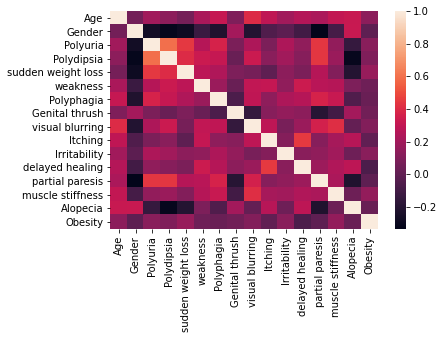

In [45]:
sns.heatmap(xfeatures.corr())



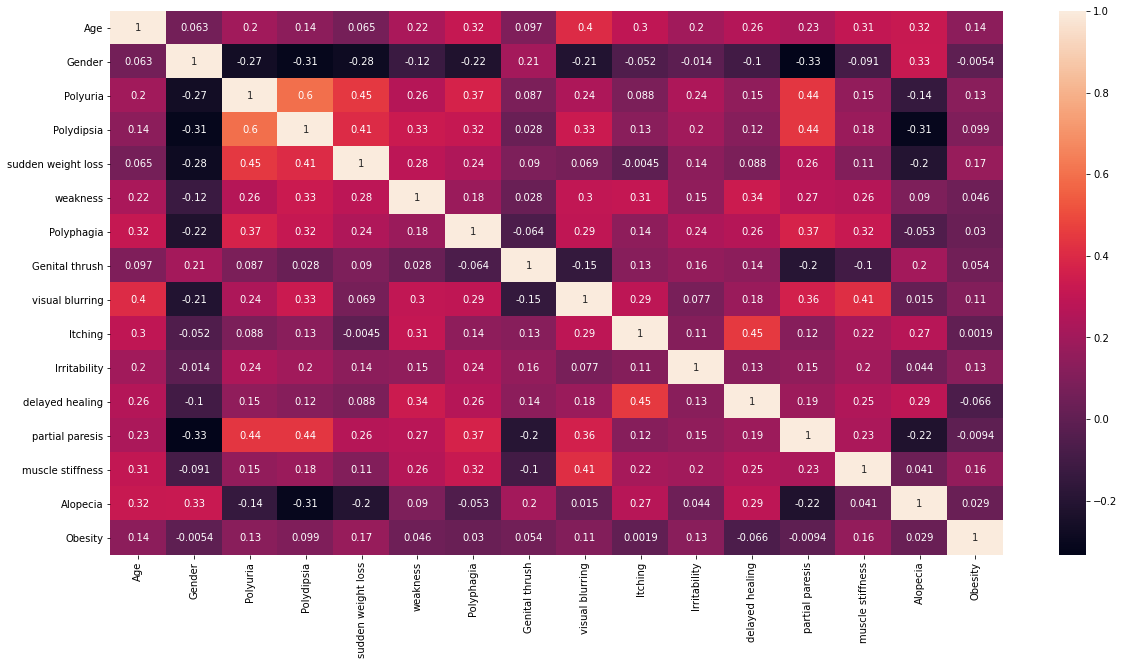

In [46]:
plt.figure(figsize=(20,10))
sns.heatmap(xfeatures.corr(),annot=True)
plt.show()


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [48]:
df.columns


Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [49]:
xfeatures


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0


In [50]:
ylabels = df['class']
df.columns


Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [51]:
x_train,x_test,y_train,y_test = train_test_split(xfeatures,ylabels,test_size=0.30,random_state=7)


In [52]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

/Users/amirbhd/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
logreg.score(x_test,y_test)


0.8910256410256411

In [54]:
x_test.iloc[2]


Age                   43
Gender                 0
Polyuria               1
Polydipsia             1
sudden weight loss     1
weakness               1
Polyphagia             1
Genital thrush         0
visual blurring        1
Itching                0
Irritability           0
delayed healing        0
partial paresis        1
muscle stiffness       1
Alopecia               0
Obesity                1
Name: 418, dtype: int64

In [55]:
res_dic = {"Negative":0,"Positive":1}
x1 = x_test.iloc[2]

In [56]:
logreg.predict(np.array(x1).reshape(1,-1))


array([1])

In [57]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)


DecisionTreeClassifier()

In [58]:
clf.score(x_test,y_test)


0.9807692307692307

In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=3)

In [60]:
knn.score(x_test,y_test)


0.8717948717948718

In [61]:
import joblib

In [62]:
model_file = open("logistic_regression_diabetes_model.pkl","wb")
joblib.dump(logreg,model_file)
model_file.close()

In [63]:
model_file_knn = open("knn_diabetes_model.pkl","wb")
joblib.dump(knn,model_file_knn)
model_file_knn.close()

In [64]:
model_file_clf = open("decision_tree_clf_diabetes_model.pkl","wb")
joblib.dump(clf,model_file_clf)
model_file_clf.close()

In [65]:
from IPython.display import Image
from sklearn import tree
import pydotplus

In [66]:
xfeatures.columns


Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')

In [67]:
feature_names_best = xfeatures.columns

In [68]:
target_names = ["Positive","Negative"]

In [69]:
dot_data = tree.export_graphviz(clf,out_file=None,feature_names=feature_names_best,class_names=target_names)





In [70]:
graph = pydotplus.graph_from_dot_data(dot_data)


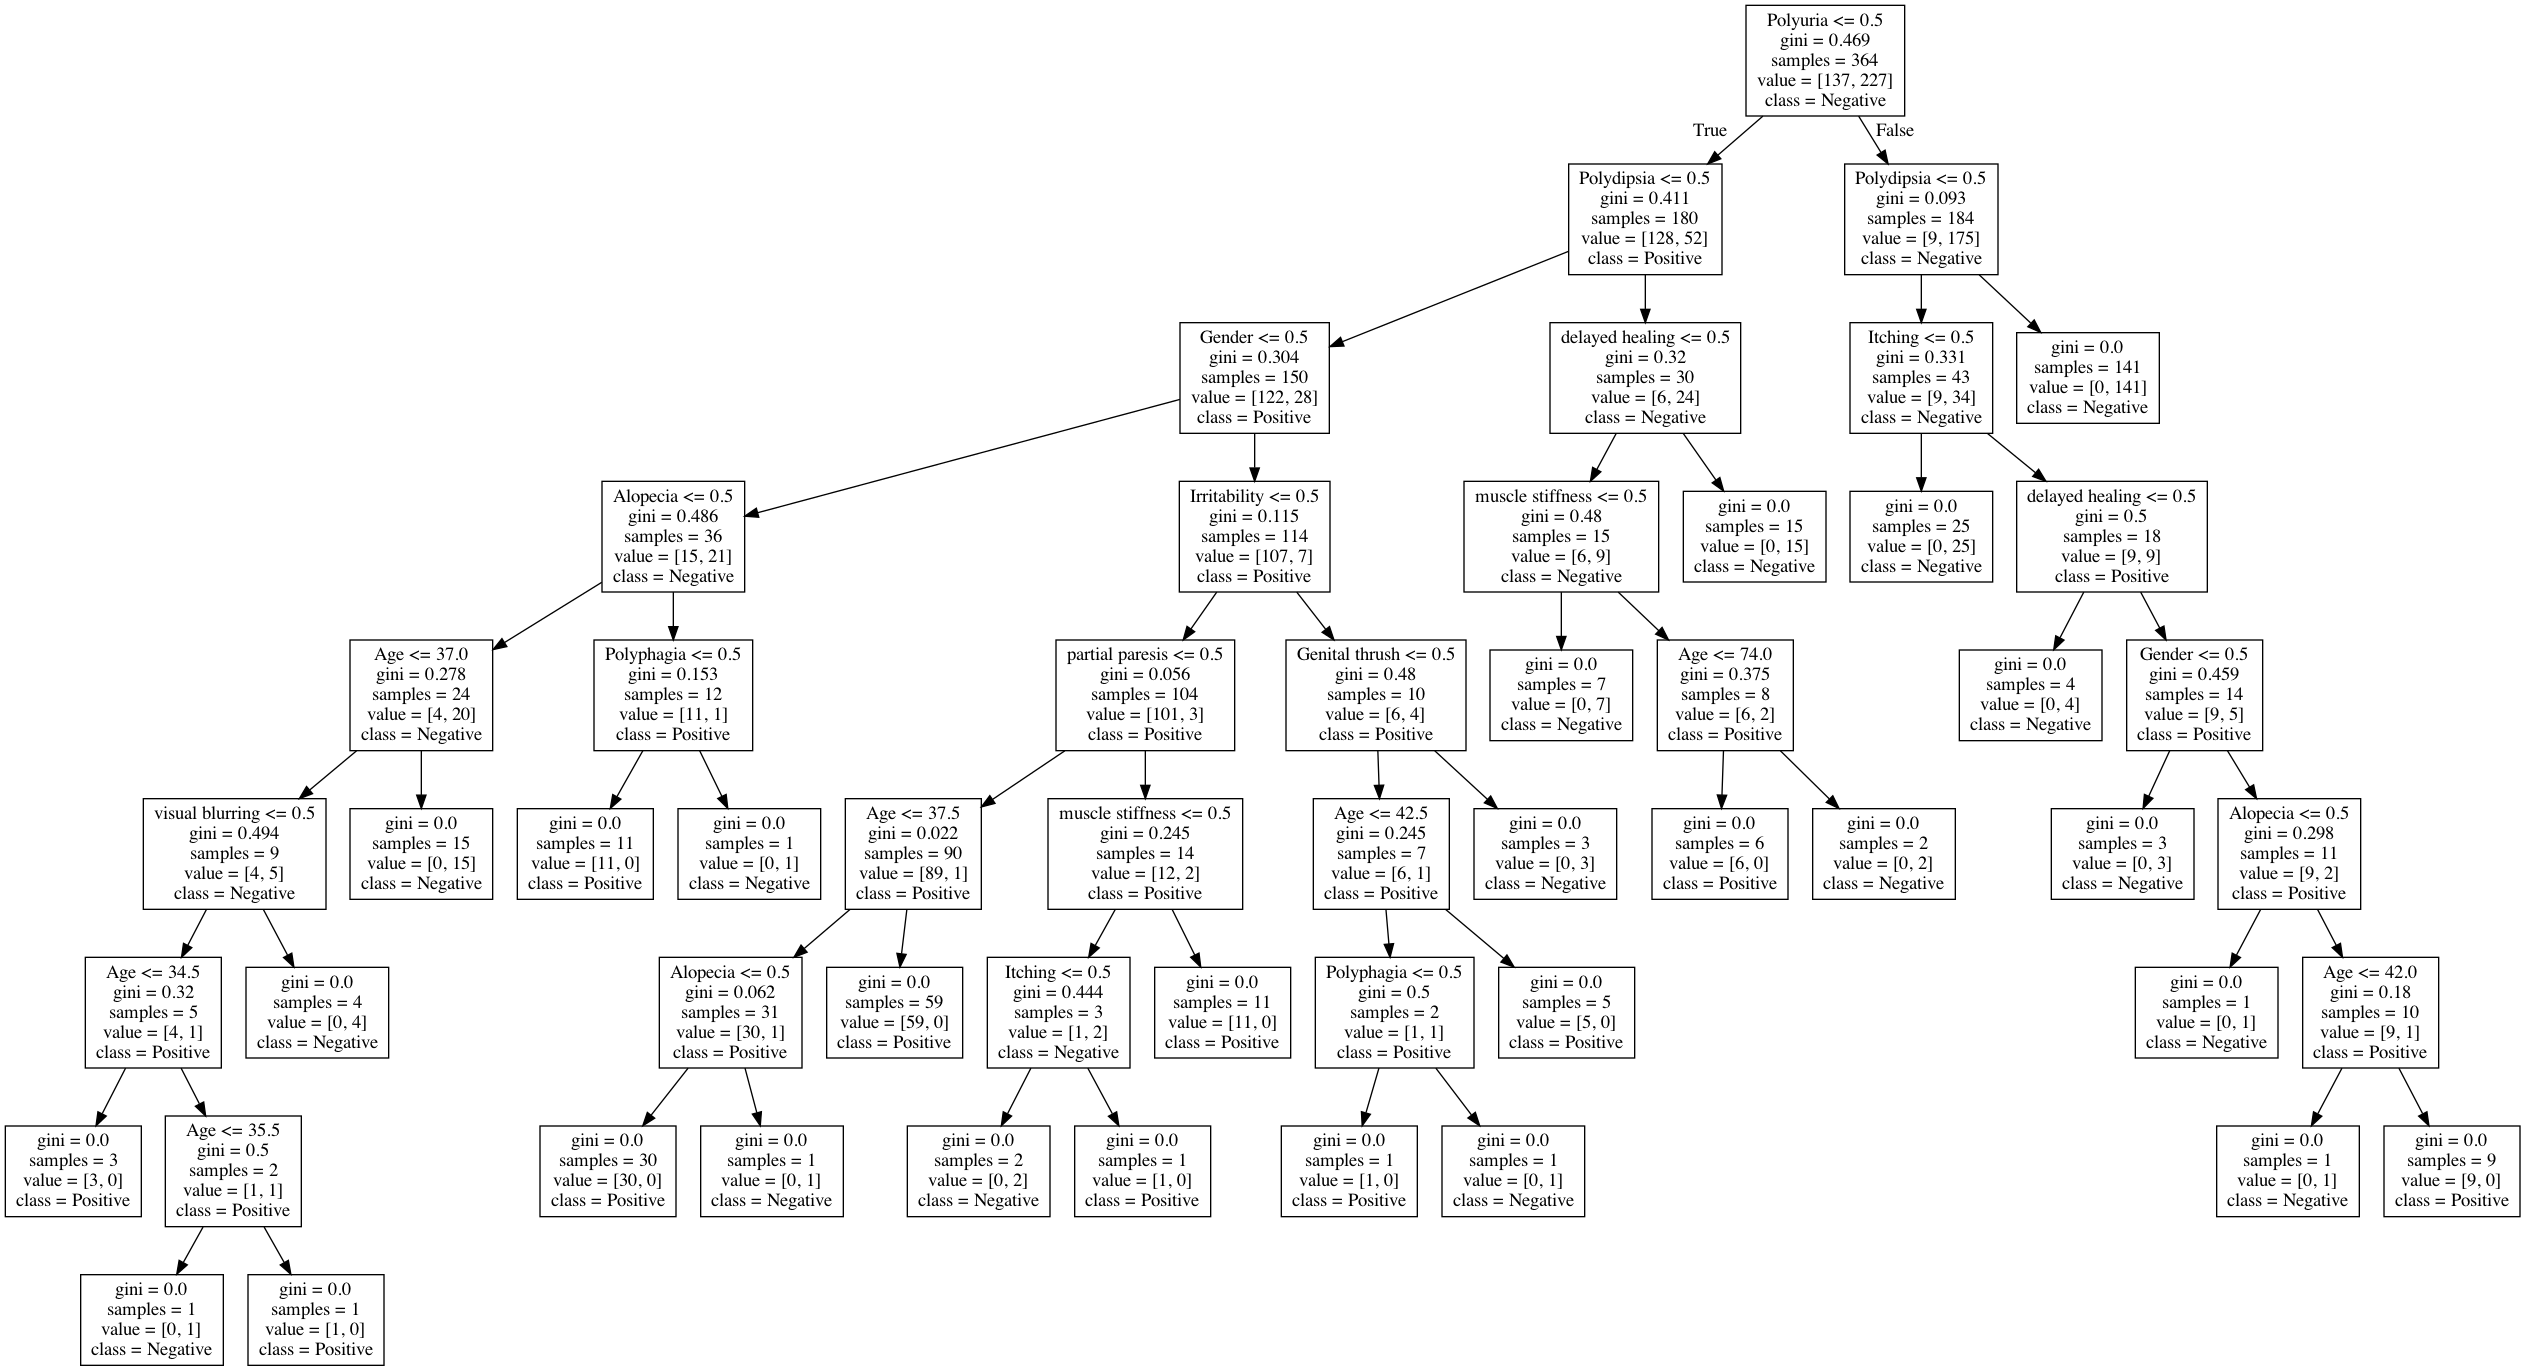

In [71]:
Image(graph.create_png())


In [72]:
graph.write_png("diabetes_decisition_tree_plot.png")


True

In [73]:
import lime
import lime.lime_tabular
dir(lime)



['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'discretize',
 'exceptions',
 'explanation',
 'lime_base',
 'lime_tabular']

In [74]:
feature_names_best

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')

In [75]:
class_names = ["Negative","Positive"]


In [76]:
explainer = lime.lime_tabular.LimeTabularExplainer(x_train.values,
                                                   feature_names=feature_names_best,
                                                   class_names=class_names,
                                                   discretize_continuous=True)

In [77]:
x_test.iloc[1]


Age                   64
Gender                 1
Polyuria               0
Polydipsia             0
sudden weight loss     0
weakness               1
Polyphagia             1
Genital thrush         0
visual blurring        1
Itching                1
Irritability           1
delayed healing        1
partial paresis        0
muscle stiffness       1
Alopecia               1
Obesity                0
Name: 322, dtype: int64

In [78]:
logreg.predict(np.array(x_test.iloc[1]).reshape(1,-1))


array([0])

In [79]:
exp = explainer.explain_instance(x_test.iloc[1],logreg.predict_proba,num_features=14,top_labels=1)


In [80]:
exp.show_in_notebook(show_table=True,show_all=False)


In [81]:
import eli5

/Users/amirbhd/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/amirbhd/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [82]:
eli5.show_weights(logreg,top=10)


In [83]:
feature_names_best = ['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity']

In [84]:
eli5.show_weights(logreg,feature_names=feature_names_best,target_names=class_names)


Weight?,Feature
+2.769,Polydipsia
+2.572,Polyuria
+1.280,Irritability
+0.992,partial paresis
+0.859,Genital thrush
+0.797,Polyphagia
+0.574,sudden weight loss
+0.573,visual blurring
+0.345,weakness
+0.054,<BIAS>
